# Новый раздел

Часть A

In [ ]:
import pandas as pd

df = pd.read_csv('/content/top50_players.csv', encoding='latin1')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nLast 5 rows of the DataFrame:")
print(df.tail())

print("\nDataFrame Info:")
df.info()

First 5 rows of the DataFrame:
   id             name             team  nationality  gender   foot  height  \
0   1   Mohammed Salah        Liverpool        Egypt    male   left     175   
1   2            Rodri  Manchester City        Spain    male  right     190   
2   3  Virgil van Dijk        Liverpool  Netherlands    male  right     193   
3   4   Erling Haaland  Manchester City       Norway    male   left     195   
4   5    Alessia Russo          Arsenal      England  female  right     173   

   weight position  pace  shooting  passing  dribbling  defending  physical  \
0      72      SGO    89        88       86         90         45        76   
1      82      MDO    65        80       86         84         86        85   
2      92      STP    73        60       72         72         90        87   
3      94      SNT    86        91       70         80         45        88   
4      64      SNT    82        88       70         87         39        73   

   overall  
0     

Часть B

In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
id             0
name           0
team           0
nationality    0
gender         0
foot           0
height         0
weight         0
position       0
pace           0
shooting       0
passing        0
dribbling      0
defending      0
physical       0
overall        0
dtype: int64


In [ ]:
initial_duplicate_rows = df.duplicated().sum()
print(f"Initial number of duplicate rows: {initial_duplicate_rows}")

if initial_duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

final_duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {final_duplicate_rows}")

Initial number of duplicate rows: 0
No duplicate rows found.
Number of duplicate rows after removal: 0


In [ ]:
from scipy.stats import zscore


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('id', errors='ignore')


z_score_threshold = 3

print(f"Detecting outliers using a Z-score threshold of {z_score_threshold}:\n")


for col in numerical_cols:
    df[f'{col}_zscore'] = zscore(df[col])


    outliers = df[(df[f'{col}_zscore'].abs() > z_score_threshold)]


    print(f"Column '{col}': {len(outliers)} potential outliers found.")

Detecting outliers using a Z-score threshold of 3:

Column 'height': 0 potential outliers found.
Column 'weight': 0 potential outliers found.
Column 'pace': 0 potential outliers found.
Column 'shooting': 0 potential outliers found.
Column 'passing': 0 potential outliers found.
Column 'dribbling': 0 potential outliers found.
Column 'defending': 0 potential outliers found.
Column 'physical': 0 potential outliers found.
Column 'overall': 0 potential outliers found.


In [ ]:
print("Descriptive statistics for numerical columns:")
print(df.describe())

Descriptive statistics for numerical columns:
             id      height     weight       pace   shooting    passing  \
count  50.00000   50.000000  50.000000  50.000000  50.000000  50.000000   
mean   25.50000  177.680000  72.180000  76.740000  74.840000  79.620000   
std    14.57738   10.893623  11.338376  10.438958  14.206006   6.966069   
min     1.00000  156.000000  48.000000  47.000000  34.000000  63.000000   
25%    13.25000  169.250000  62.500000  71.000000  74.000000  73.000000   
50%    25.50000  178.000000  72.000000  79.000000  80.000000  82.000000   
75%    37.75000  185.750000  78.500000  85.500000  83.000000  85.000000   
max    50.00000  196.000000  95.000000  91.000000  91.000000  89.000000   

       dribbling  defending   physical    overall  height_zscore  \
count  50.000000  50.000000  50.000000  50.000000   5.000000e+01   
mean   82.160000  67.380000  77.780000  86.880000  -6.461498e-16   
std     7.265687  17.730281   8.036371   1.611692   1.010153e+00   
min   

In [ ]:
print("\nUnique values and their frequencies for categorical columns:")

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nColumn '{col}':")
    print(df[col].value_counts())


Unique values and their frequencies for categorical columns:

Column 'name':
name
Millie Bright           2
Rodri                   1
Virgil van Dijk         1
Erling Haaland          1
Alessia Russo           1
Mariona                 1
Gianluigi Donnarumma    1
Khadija Shaw            1
Florian Wirtz           1
Guro Reiten             1
Alexander Isak          1
Gabriel                 1
Bukayo Saka             1
Cole Palmer             1
Chloe Kelly             1
Lucy Bronze             1
Mohammed Salah          1
Moises Caicedo          1
Declan Rice             1
Beth Mead               1
Leah Williamson         1
Bruno Fernandes         1
William Saliba          1
Alexis Mac Allister     1
Lauren Hemp             1
Martin Odegaard         1
Katie McCabe            1
David Raya              1
Victor Gyökeres         1
Sam Kerr                1
Ruben Dias              1
Bruno Guimaraes         1
Ibrahima Konate         1
Sandro Tonali           1
Tijjani Reijnders       1
Chiamak

In [ ]:
print(
    "\nCorrelation matrix for numerical columns (excluding Z-score columns):"
)


numerical_cols_for_corr = df.select_dtypes(include=['int64', 'float64']).columns.drop(
    ['id', 'height_zscore', 'weight_zscore', 'pace_zscore', 'shooting_zscore', 'passing_zscore', 'dribbling_zscore', 'defending_zscore', 'physical_zscore', 'overall_zscore'], errors='ignore'
)

print(df[numerical_cols_for_corr].corr())


Correlation matrix for numerical columns (excluding Z-score columns):
             height    weight      pace  shooting   passing  dribbling  \
height     1.000000  0.911867 -0.204616 -0.230062 -0.451560  -0.350264   
weight     0.911867  1.000000 -0.166330 -0.276026 -0.518726  -0.413816   
pace      -0.204616 -0.166330  1.000000  0.456055  0.083088   0.610548   
shooting  -0.230062 -0.276026  0.456055  1.000000  0.566289   0.827127   
passing   -0.451560 -0.518726  0.083088  0.566289  1.000000   0.645164   
dribbling -0.350264 -0.413816  0.610548  0.827127  0.645164   1.000000   
defending  0.099330  0.097210 -0.572604 -0.672014 -0.023262  -0.526913   
physical   0.609710  0.666087 -0.206015 -0.295806 -0.546160  -0.500591   
overall    0.295338  0.244666  0.079379  0.135521 -0.184102   0.015615   

           defending  physical   overall  
height      0.099330  0.609710  0.295338  
weight      0.097210  0.666087  0.244666  
pace       -0.572604 -0.206015  0.079379  
shooting   -0.67

Часть C



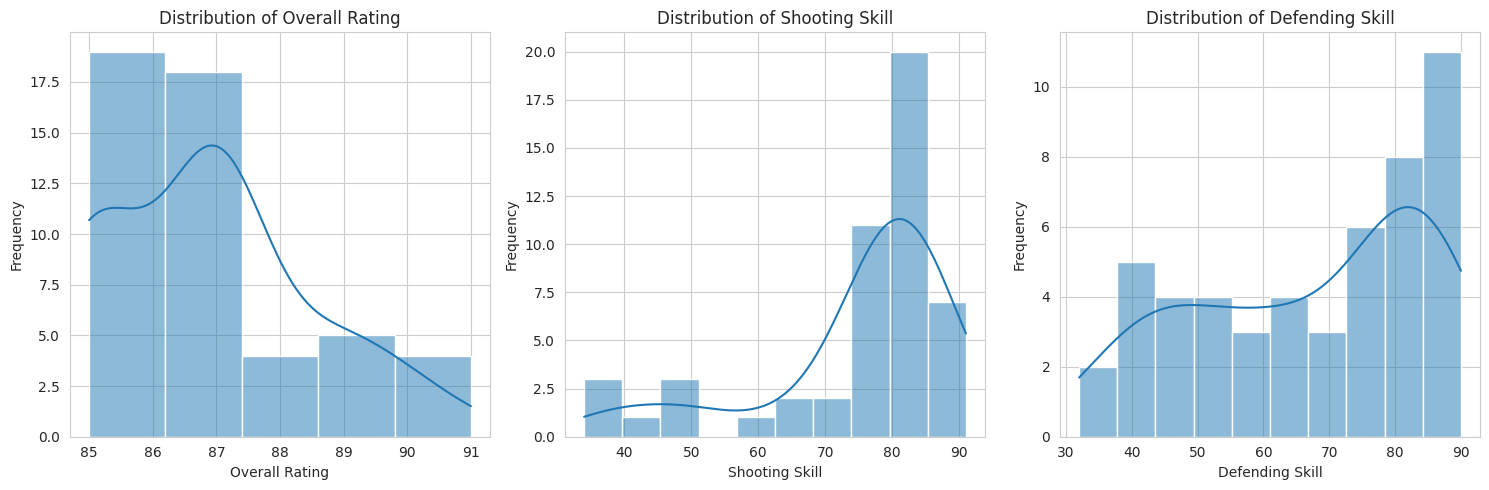

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['overall'], kde=True, bins=5)
plt.title('Distribution of Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['shooting'], kde=True, bins=10)
plt.title('Distribution of Shooting Skill')
plt.xlabel('Shooting Skill')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['defending'], kde=True, bins=10)
plt.title('Distribution of Defending Skill')
plt.xlabel('Defending Skill')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/tmp/ipython-input-1865083667.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='viridis')
/tmp/ipython-input-1865083667.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='foot', palette='cividis')


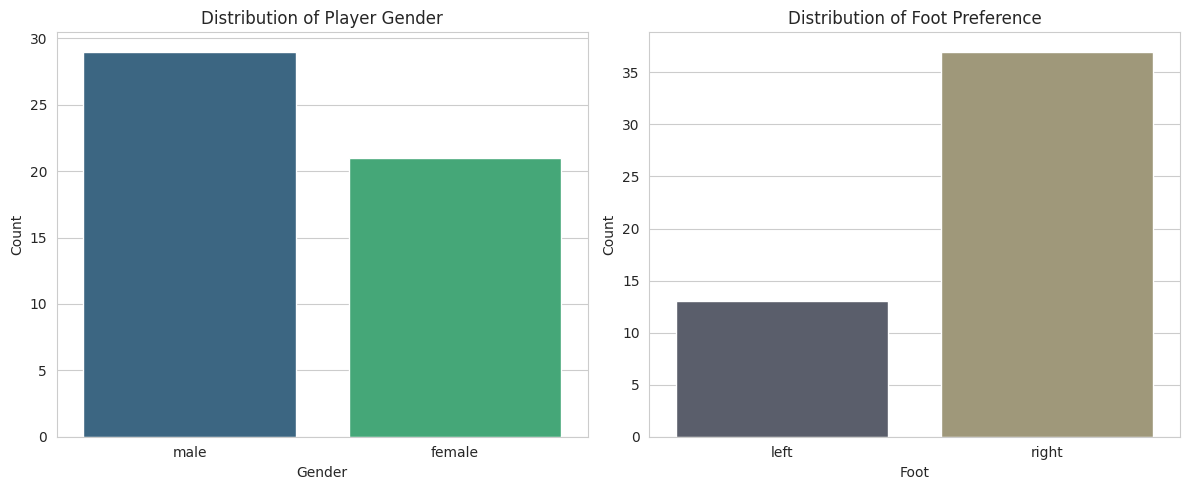

In [ ]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.countplot(data=df, x='gender', palette='viridis')
plt.title('Distribution of Player Gender')
plt.xlabel('Gender')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.countplot(data=df, x='foot', palette='cividis')
plt.title('Distribution of Foot Preference')
plt.xlabel('Foot')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

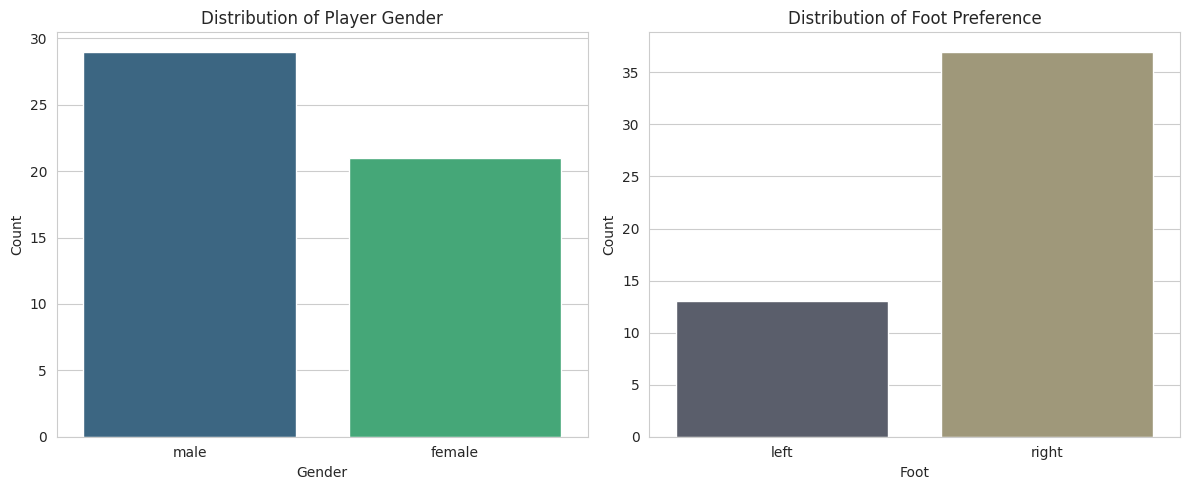

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.countplot(data=df, x='gender', hue='gender', palette='viridis', legend=False)
plt.title('Distribution of Player Gender')
plt.xlabel('Gender')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.countplot(data=df, x='foot', hue='foot', palette='cividis', legend=False)
plt.title('Distribution of Foot Preference')
plt.xlabel('Foot')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

/tmp/ipython-input-4099947971.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['team'].isin(top_5_teams)], x='team', order=top_5_teams, palette='magma')


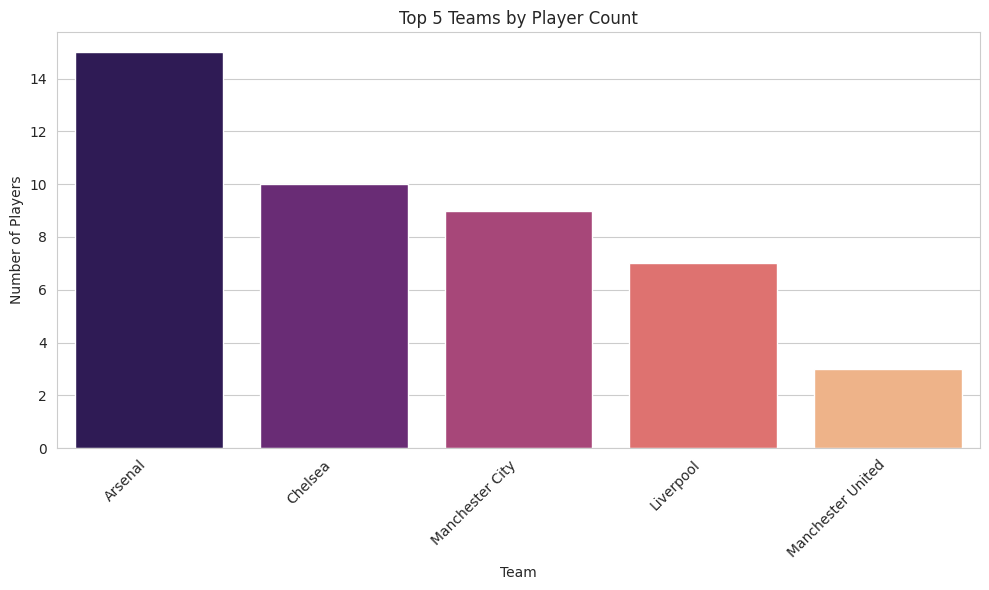

In [ ]:
plt.figure(figsize=(10, 6))


top_5_teams = df['team'].value_counts().nlargest(5).index
sns.countplot(data=df[df['team'].isin(top_5_teams)], x='team', order=top_5_teams, palette='magma')
plt.title('Top 5 Teams by Player Count')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

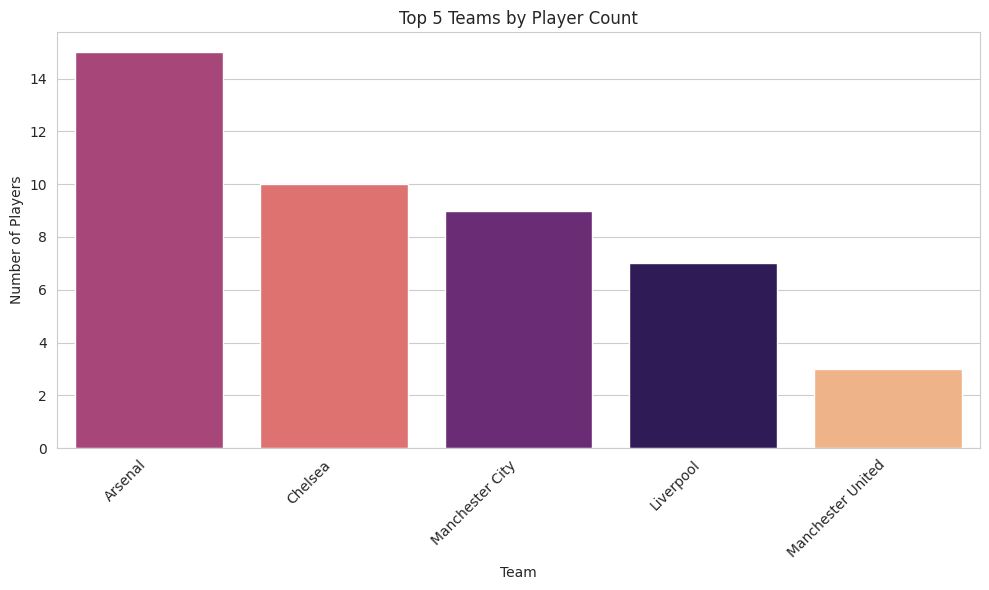

In [ ]:
plt.figure(figsize=(10, 6))


top_5_teams = df['team'].value_counts().nlargest(5).index
sns.countplot(data=df[df['team'].isin(top_5_teams)], x='team', hue='team', order=top_5_teams, palette='magma', legend=False)
plt.title('Top 5 Teams by Player Count')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2026153187.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='overall', palette='Pastel1')
/tmp/ipython-input-2026153187.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['position'].isin(top_positions)], x='position', y='overall', palette='coolwarm')


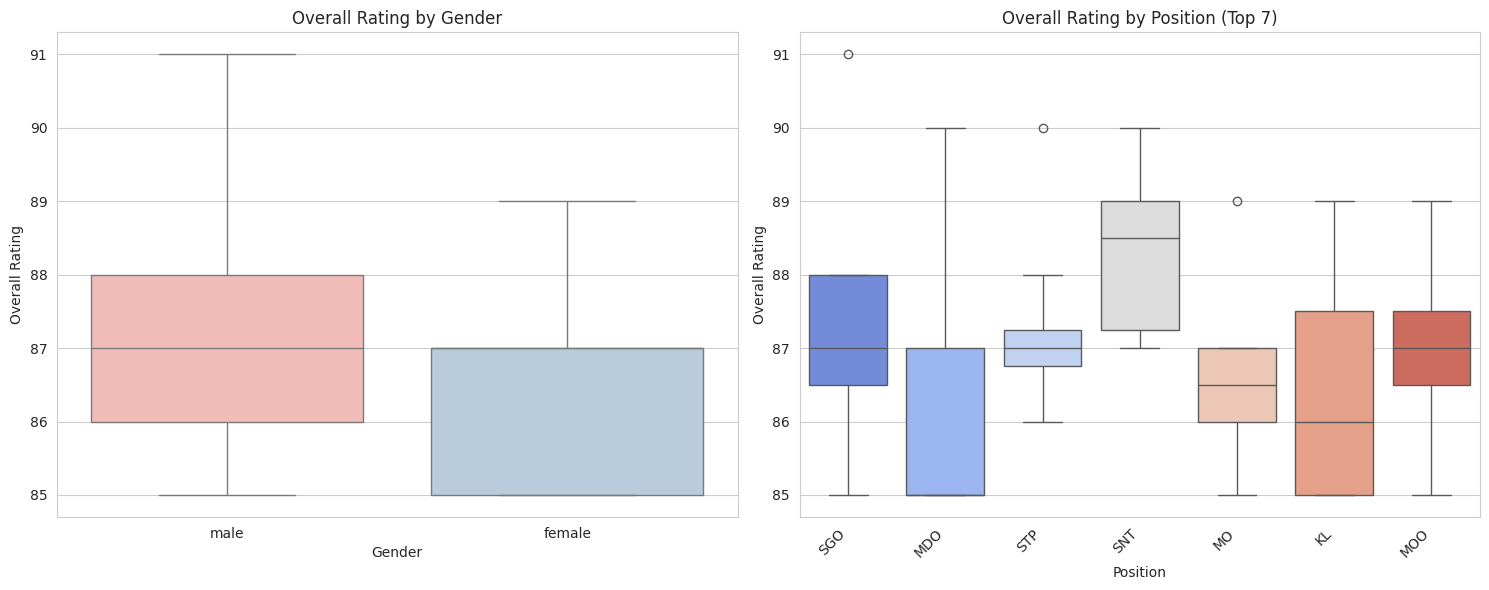

In [ ]:
plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='gender', y='overall', palette='Pastel1')
plt.title('Overall Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Overall Rating')


plt.subplot(1, 2, 2)

top_positions = df['position'].value_counts().nlargest(7).index
sns.boxplot(data=df[df['position'].isin(top_positions)], x='position', y='overall', palette='coolwarm')
plt.title('Overall Rating by Position (Top 7)')
plt.xlabel('Position')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

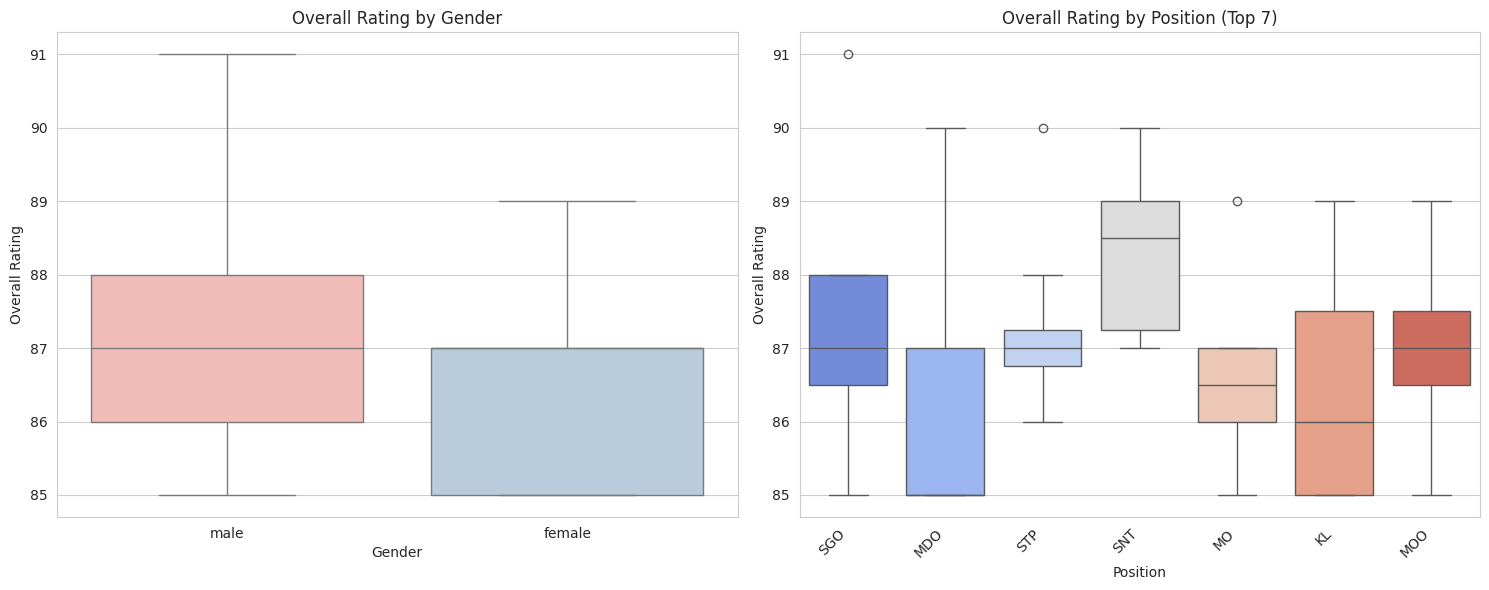

In [ ]:
plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='gender', y='overall', hue='gender', palette='Pastel1', legend=False)
plt.title('Overall Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Overall Rating')


plt.subplot(1, 2, 2)

top_positions = df['position'].value_counts().nlargest(7).index
sns.boxplot(data=df[df['position'].isin(top_positions)], x='position', y='overall', hue='position', palette='coolwarm', legend=False)
plt.title('Overall Rating by Position (Top 7)')
plt.xlabel('Position')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

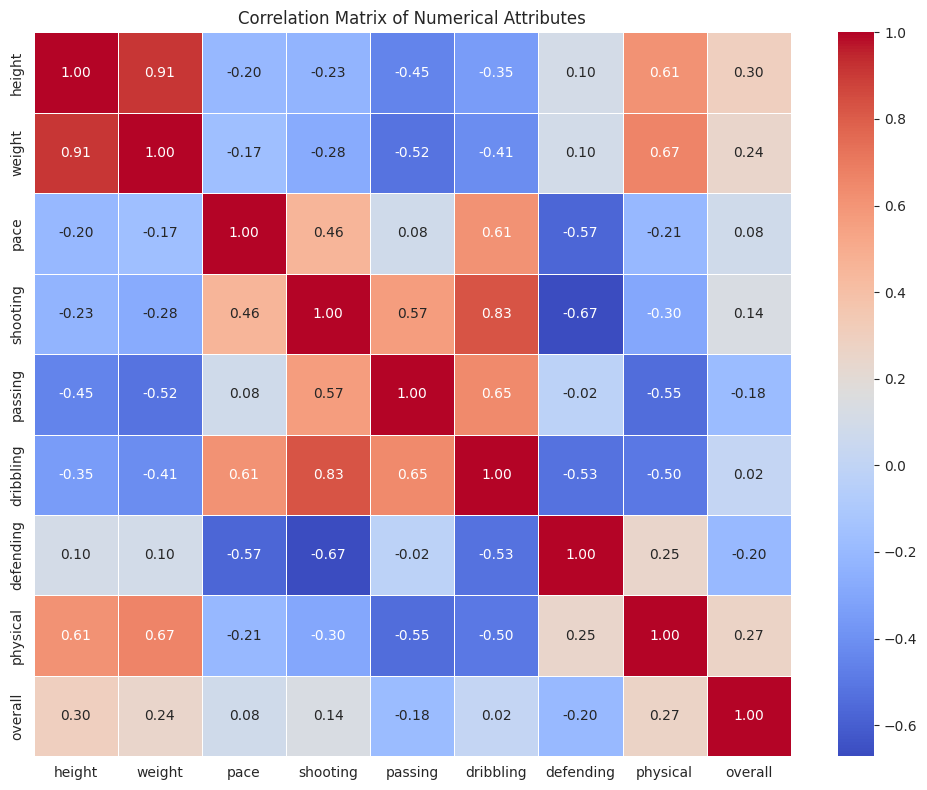

In [ ]:
plt.figure(figsize=(10, 8))


numerical_cols_for_corr = df.select_dtypes(include=['int64', 'float64']).columns.drop(
    ['id', 'height_zscore', 'weight_zscore', 'pace_zscore', 'shooting_zscore', 'passing_zscore', 'dribbling_zscore', 'defending_zscore', 'physical_zscore', 'overall_zscore'], errors='ignore'
)

correlation_matrix = df[numerical_cols_for_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Attributes')
plt.tight_layout()
plt.show()

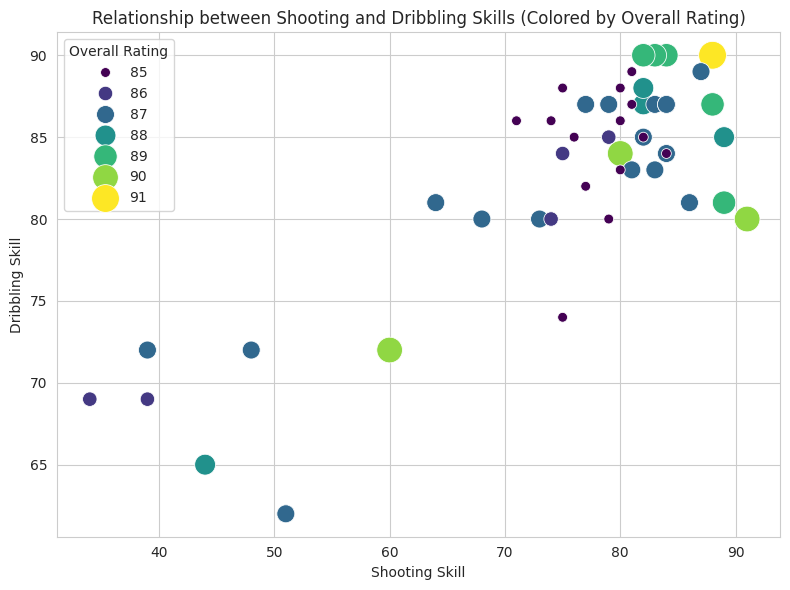

In [ ]:
plt.figure(figsize=(8, 6))


sns.scatterplot(data=df, x='shooting', y='dribbling', hue='overall', size='overall', sizes=(50, 400), palette='viridis')
plt.title('Relationship between Shooting and Dribbling Skills (Colored by Overall Rating)')
plt.xlabel('Shooting Skill')
plt.ylabel('Dribbling Skill')
plt.legend(title='Overall Rating')
plt.tight_layout()
plt.show()

Часть D

In [ ]:
print("Mean 'overall' rating and 'shooting' skill by Gender:")
gender_avg_stats = df.groupby('gender')[['overall', 'shooting']].mean()
print(gender_avg_stats)

Mean 'overall' rating and 'shooting' skill by Gender:
          overall   shooting
gender                      
female  86.571429  75.809524
male    87.103448  74.137931


In [ ]:
print("\nCount of players by Team:")
team_counts = df.groupby('team').size()
print(team_counts)


Count of players by Team:
team
Arsenal                   15
Aston Villa                2
Brighton & Hove Albion     1
Chelsea                   10
Liverpool                  7
Manchester City            9
Manchester United          3
Newcastle United           2
Sunderland                 1
dtype: int64


In [ ]:
print("\nMedian 'overall' rating by Nationality:")
nationality_median_overall = df.groupby('nationality')['overall'].median()
print(nationality_median_overall)


Median 'overall' rating by Nationality:
nationality
Argentina      86.0
Australian     86.0
Belgium        85.0
Brazil         87.0
Cameroon       85.0
Ecuador        87.0
Egypt          91.0
England        87.0
France         86.0
Germany        89.0
Ireland        87.0
Italy          87.5
Jamaika        89.0
Japan          85.0
Netherlands    86.0
Nigerian       85.0
Norway         88.0
Portugal       86.5
Scotch         85.0
Spain          89.0
Sweden         88.0
Sweeden        87.0
Switzerland    85.0
Name: overall, dtype: float64


In [ ]:
print("\nPivot table showing average overall, shooting, and defending by gender and position:")
pivot_table = df.pivot_table(
    values=['overall', 'shooting', 'defending'],
    index='gender',
    columns='position',
    aggfunc='mean'
)
print(pivot_table)


Pivot table showing average overall, shooting, and defending by gender and position:
          defending                                                           \
position         KL        MDO    MO        MOO   SGB        SGK   SGO   SLB   
gender                                                                         
female    63.000000  79.666667  76.0  51.000000  87.0        NaN  50.0  83.0   
male      66.333333  82.166667  75.2  56.333333   NaN  55.333333  45.0   NaN   

                      ... shooting                                          \
position   SLK   SLO  ...       MO        MOO   SGB        SGK   SGO   SLB   
gender                ...                                                    
female    63.0  59.0  ...     84.0  80.000000  68.0        NaN  83.0  81.0   
male       NaN   NaN  ...     78.8  82.666667   NaN  82.333333  88.0   NaN   

                                            
position   SLK        SLO        SNT   STP  
gender                          